## 3184 양
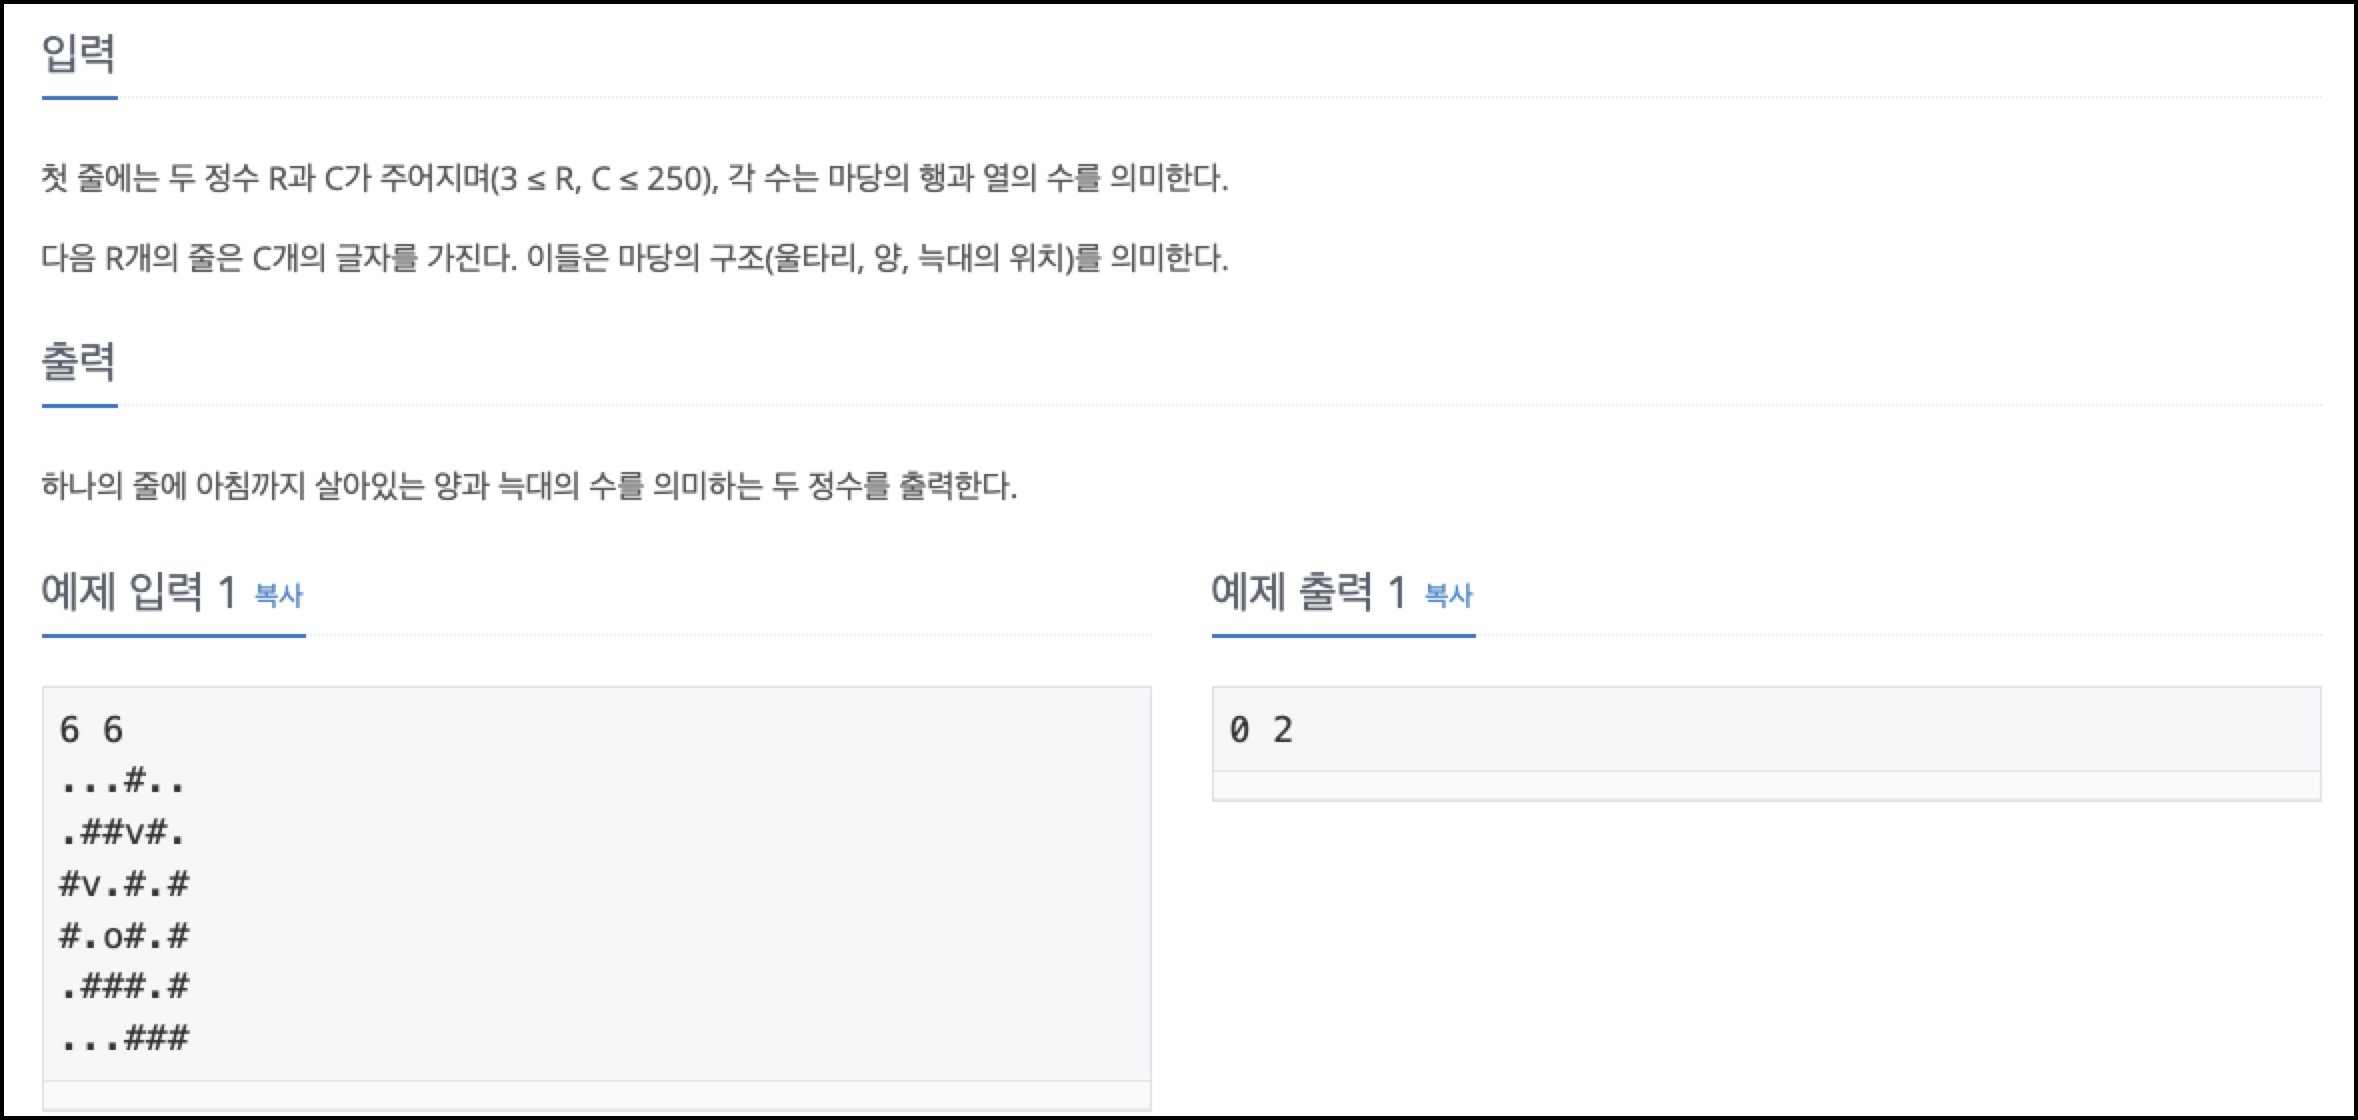
https://www.acmicpc.net/problem/3184

상상코딩: 맨 왼쪽 위부터, 오른쪽 아래로 이중 포문을 돌면서 각 울타리를 인식해야 한다.<br>
    울타리가 아닐경우 BFS를 이용해서 울타리가 나오거나, 칸 밖인 경우를 제외하고 전체를 탐색하면서, 양과 늑대의 개수를 세고, 개수를 카운트 한 경우는 그 위치를 울타리로 바꿔 다시 탐색하지 못하게 한다.<br>
    그렇게 하나의 BFS를 할때마다 양과 늑대의 개수에 따라 살아남는 양과 늑대를 계산해 result에 넣는다.

### 복습 풀이
    문제:  '.' (점)은 빈 필드를 의미하며, 글자 '#'는 울타리를, 'o'는 양, 'v'는 늑대를 의미
    아침이 도달했을 때 살아남은 양과 늑대의 수를 출력.
    한 칸에서 수평, 수직만으로 이동
    마당의 행과 열의 수 R, C와 다음 줄부터 R에 걸쳐 C개의 글자를 갖는 문자열이 주어진다.
    살아있는 양과 늑대의 수를 의미하는 두 정수를 출력
    
    조건
    1. 마당에서 "탈출"할 수 있는 칸은 어떤 영역에도 속하지 않는다고 간주
    2. 양의 수가 늑대수보다 많으면 늑대를 쫓아내고
    3. 양의 수가 늑대수보다 작거나같으면 양은 다 먹힌다.

    내 풀이: 마당 밖으로 나갈 수 있는 영역 파악
    모든 r,c를 움직이며 .이 나오면 해당 영역에 연결된 요소를 탐색해서 양의 개수, 늑대의 개수
    양, 늑대수 계산된곳은 모두 울타리로 채워넣기(또 방문 방지)
    dfs로 풀었더니 recursion overflow 에러가 난다 BFS로 풀자 시바꺼
    
    왜 DFS말고 BFS로 풀어야 하는가? 연산이 더 적은가? 왜 더 적은가? 찾아보자
    

In [ ]:
from collections import deque
R,C=map(int,input().split())
m=[list(input()) for _ in range(R)]
def bfs(r,c):
    d={'o':0, 'v':0}
    q=deque([(r,c)])
    if m[r][c]!='.':
        d[m[r][c]]+=1
    m[r][c]='#'
    while q:
        r,c=q.popleft()
        for dc in [(0,1),(0,-1),(1,0),(-1,0)]:
            nr=r+dc[0]
            nc=c+dc[1]
            if not(0<=nr<R and 0<=nc<C):
                continue
            if m[nr][nc]!='#':
                if m[nr][nc]!='.':
                    d[m[nr][nc]]+=1
                m[nr][nc]='#'
                q.append((nr,nc))
    return d['o'],d['v']
sheep,wolf=0,0
for r in range(R):
    for c in range(C):
        if m[r][c]!='#':
            s,w=bfs(r,c)
            if s>w:
                sheep+=s
            else:
                wolf+=w
print(sheep,wolf)

In [113]:
from collections import deque

In [ ]:
R,C=map(int,input().split())
m=[list(input()) for _ in range(R)]

In [148]:
def bfs(r,c):
    d={'o':0, 'v':0}
    q=deque([(r,c)])
    if m[r][c]!='.':
        d[m[r][c]]+=1
    m[r][c]='#'
    while q:
        r,c=q.popleft()
        for dc in [(0,1),(0,-1),(1,0),(-1,0)]:
            nr=r+dc[0]
            nc=c+dc[1]
            if not(0<=nr<R and 0<=nc<C):
                continue
            if m[nr][nc]!='#':
                if m[nr][nc]!='.':
                    d[m[nr][nc]]+=1
                m[nr][nc]='#'
                q.append((nr,nc))
    return d['o'],d['v']

In [149]:
sheep,wolf=0,0
for r in range(R):
    for c in range(C):
        if m[r][c]!='#':
            s,w=bfs(r,c)
            if s>w:
                sheep+=s
            else:
                wolf+=w
print(sheep,wolf)

3 1


In [147]:
R,C=8,8
m=[['.', '#', '#', '#', '#', '#', '#', '.'],
 ['#', '.', '.', 'o', '.', '.', '.', '#'],
 ['#', '.', '#', '#', '#', '#', '.', '#'],
 ['#', '.', '#', 'v', '.', '#', '.', '#'],
 ['#', '.', '#', '.', 'o', '#', 'o', '#'],
 ['#', 'o', '.', '#', '#', '.', '.', '#'],
 ['#', '.', 'v', '.', '.', 'v', '.', '#'],
 ['.', '#', '#', '#', '#', '#', '#', '.']]
# return 3 1

In [46]:
R,C=6,6
m=[['.', '.', '.', '#', '.', '.'],
 ['.', '#', '#', 'v', '#', '.'],
 ['#', 'v', '.', '#', '.', '#'],
 ['#', '.', 'o', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]
# return 0 2

In [81]:
m=[['.', '.', '.', '#', '.', '.'],
 ['.', '#', '#', 'v', '#', '.'],
 ['#', 'v', '.', '#', '.', '#'],
 ['#', '.', 'o', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

def bfs(y,x):
    s,w=0,0
    q=d([(y,x)])
    while q:
        cy,cx=q.popleft()
        for (dy,dx) in [(0,1),(0,-1),(1,0),(-1,0)]:
            ny,nx=cy+dy,cx+dx
            if 0<=ny<r and 0<=nx<c and A[ny][nx]!="#":
                if A[ny][nx]=="o":s+=1
                elif A[ny][nx]=="v":w+=1
                A[ny][nx]="#"
                q+=[(ny, nx)]
    if w>=s: return[0,w]
    else: return [s,0]

In [83]:
m=[['.', '.', '.', '#', '.', '.'],
 ['.', '#', '#', 'v', '#', '.'],
 ['#', 'v', '.', '#', '.', '#'],
 ['#', '.', 'o', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

# '#'이 아닌 경우 bfs로 들어오게 하기
def bfs(r,c):
    result_di = {'o':0,'v':0}
    q = deque([(r,c)])
    while q:
        r,c = q.popleft()
        for x,y in zip(dx,dy):
            nr = r + x
            nc = c + y
#             print(f"nr: {nr}, nc:{nc}, m[nr][nc]: {m[nr][nc]}")
            if not ((0 <= nr < R) and (0 <= nc < C)):
                continue
#             print(f'>>>>>>>>{m[nr][nc]}')
            if m[nr][nc] != '#':
                if m[nr][nc] != '.':
                    result_di[m[nr][nc]]+=1
                m[nr][nc]='#'
                q.append((nr,nc))
    print(f"울타리 하나 끝. 양: {result_di['o']}, 늑대: {result_di['v']}")
    display(m)
    if result_di['o'] > result_di['v']:
        return result_di['o'],0
    else:
        return 0,result_di['v']

In [84]:
sheep, wolf = 0,0
for r in range(R):
    for c in range(C):
        unit_s, unit_w = bfs(r,c)
        sheep+=unit_s
        wolf+=unit_w

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '.', '.'],
 ['#', '#', '#', 'v', '#', '.'],
 ['#', 'v', '.', '#', '.', '#'],
 ['#', '.', 'o', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '.', '.'],
 ['#', '#', '#', 'v', '#', '.'],
 ['#', 'v', '.', '#', '.', '#'],
 ['#', '.', 'o', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '.', '.'],
 ['#', '#', '#', 'v', '#', '.'],
 ['#', 'v', '.', '#', '.', '#'],
 ['#', '.', 'o', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 1


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', 'v', '.', '#', '.', '#'],
 ['#', '.', 'o', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', 'v', '.', '#', '.', '#'],
 ['#', '.', 'o', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', 'v', '.', '#', '.', '#'],
 ['#', '.', 'o', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', 'v', '.', '#', '.', '#'],
 ['#', '.', 'o', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 1, 늑대: 1


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '.', '#'],
 ['#', '#', '#', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '.', '#'],
 ['#', '#', '#', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '.', '#'],
 ['#', '#', '#', '#', '.', '#'],
 ['.', '#', '#', '#', '.', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['.', '#', '#', '#', '#', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['.', '#', '#', '#', '#', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['.', '#', '#', '#', '#', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['.', '#', '#', '#', '#', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['.', '#', '#', '#', '#', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['.', '#', '#', '#', '#', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['.', '#', '#', '#', '#', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['.', '#', '#', '#', '#', '#'],
 ['.', '.', '.', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

울타리 하나 끝. 양: 0, 늑대: 0


[['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#'],
 ['#', '#', '#', '#', '#', '#']]

In [85]:
print(sheep,wolf)

0 2


### 제출풀이

In [ ]:
from collections import deque

R,C=map(int,input().split())
m = [list(input()) for _ in range(R)]

dx=[0,0,1,-1]
dy=[1,-1,0,0]

def bfs(r,c):
    result_di = {'o':0,'v':0}
    if m[r][c] != '.':
        result_di[m[r][c]]+=1
    m[r][c]='#'
    q = deque([(r,c)])
    while q:
        r,c = q.popleft()
        for x,y in zip(dx,dy):
            nr = r + x
            nc = c + y
            if not ((0 <= nr < R) and (0 <= nc < C)):
                continue
            if m[nr][nc] != '#':
                if m[nr][nc] != '.':
                    result_di[m[nr][nc]]+=1
                m[nr][nc]='#'
                q.append((nr,nc))
    if result_di['o'] > result_di['v']:
        return result_di['o'],0
    else:
        return 0,result_di['v']

sheep, wolf = 0,0
for r in range(R):
    for c in range(C):
        if m[r][c] != '#':
            unit_s, unit_w = bfs(r,c)
            sheep+=unit_s
            wolf+=unit_w

print(sheep,wolf)

### 더 오래걸리지만 짧은 풀이

In [ ]:
from collections import deque
R,C=map(int,input().split())
m = [list(input()) for _ in range(R)]
dx=[0,0,1,-1]
dy=[1,-1,0,0]
def bfs(r,c):
    result_di = {'o':0,'v':0}
    q = deque([(r,c)])
    while q:
        r,c = q.popleft()
        for x,y in zip(dx,dy):
            nr=r+x;nc=c+y
            if not((0 <= nr < R) and (0 <= nc < C)):
                continue
            if m[nr][nc] != '#':
                if m[nr][nc] != '.':
                    result_di[m[nr][nc]]+=1
                m[nr][nc]='#'
                q.append((nr,nc))
    if result_di['o'] > result_di['v']:
        return result_di['o'],0
    else:
        return 0,result_di['v']
sheep, wolf = 0,0
for r in range(R):
    for c in range(C):
        unit_s, unit_w = bfs(r,c)
        sheep+=unit_s
        wolf+=unit_w
print(sheep,wolf)

## 11725 트리의 부모 찾기

1번 노드를 루트로 하는 트리가 주어진다. 각 노드의 부모를 구하는 프로그램 작성.

    입력
    첫째 줄에 노드의 개수 N (2 ≤ N ≤ 100,000)이 주어진다. 둘째 줄부터 N-1개의 줄에 트리 상에서 연결된 두 정점이 주어진다.

    출력
    첫째 줄부터 N-1개의 줄에 각 노드의 부모 노드 번호를 2번 노드부터 순서대로 출력한다.

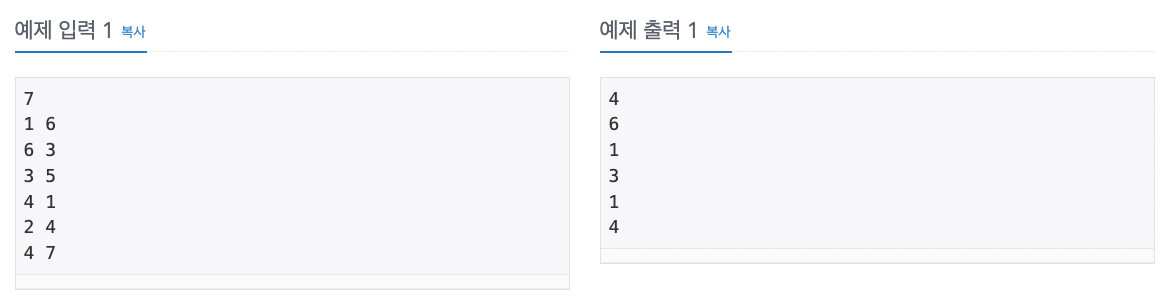

    상상코딩: 노드는 1부터 순서대로 주어진다. 각 인덱스를 노드번호로하고, 인덱스의 값으로 해당 노드에 연결된 노드들의 리스트를 갖는 이중리스트를 만든다.
    1부터 너비우선 탐색을 해간다. 1과 연결된 애들은 1을 부모로 지정 (결과 리스트의 인덱스를 각 노드, 값을 부모 노드의 번호로 저장) 그 다음 너비 우선 탐색에선 탐색 하기 전 노드가, 탐색한 노드의 부모노드이다.
    예를들어, 4번 노드에서 2, 7이 너비우선탐색되었다면 2,7의 부모는 4번 노드

In [1]:
N=int(input())
N

7


7

In [8]:
t=[[] for _ in range(N+1)]

In [24]:
result=[0]*(N+1)

In [14]:
for i in range(N-1):
    a,b=map(int,input().split())
    t[a]+=[b]
    t[b]+=[a]

1 6
6 3
3 5
4 1
2 4
4 7


In [26]:
from collections import deque

In [30]:
q = deque([1])

In [32]:
while q:
    n=q.popleft()
    child_li=t[n]
    for c in child_li:
        if result[c]==0 and c!=1:
            result[c]=n
            q.append(c)

In [35]:
print(*result[2:],sep='\n')

4
6
1
3
1
4


### 제출 풀이

In [ ]:
from collections import deque
N=int(input())
t=[[] for _ in range(N+1)]
result=[0]*(N+1)
for i in range(N-1):
    a,b=map(int,input().split())
    t[a]+=[b]
    t[b]+=[a]
q = deque([1])
while q:
    n=q.popleft()
    child_li=t[n]
    for c in child_li:
        if result[c]==0 and c!=1:
            result[c]=n
            q.append(c)

print(*result[2:],sep='\n')

### 숏코딩

In [36]:
from collections import deque as d
N=int(input());t=[[] for _ in range(N+1)];r=[0]*(N+1)
for i in range(N-1):
    a,b=map(int,input().split())
    t[a]+=[b];t[b]+=[a]
q=d([1])
while q:
    n=q.popleft();C=t[n]
    for c in C:
        if r[c]==0 and c!=1:
            r[c]=n;q.append(c)
print(*r[2:],sep='\n')

7
1 6
6 3
3 5
4 1
2 4
4 7
4
6
1
3
1
4


## 11724 연결 요소의 개수

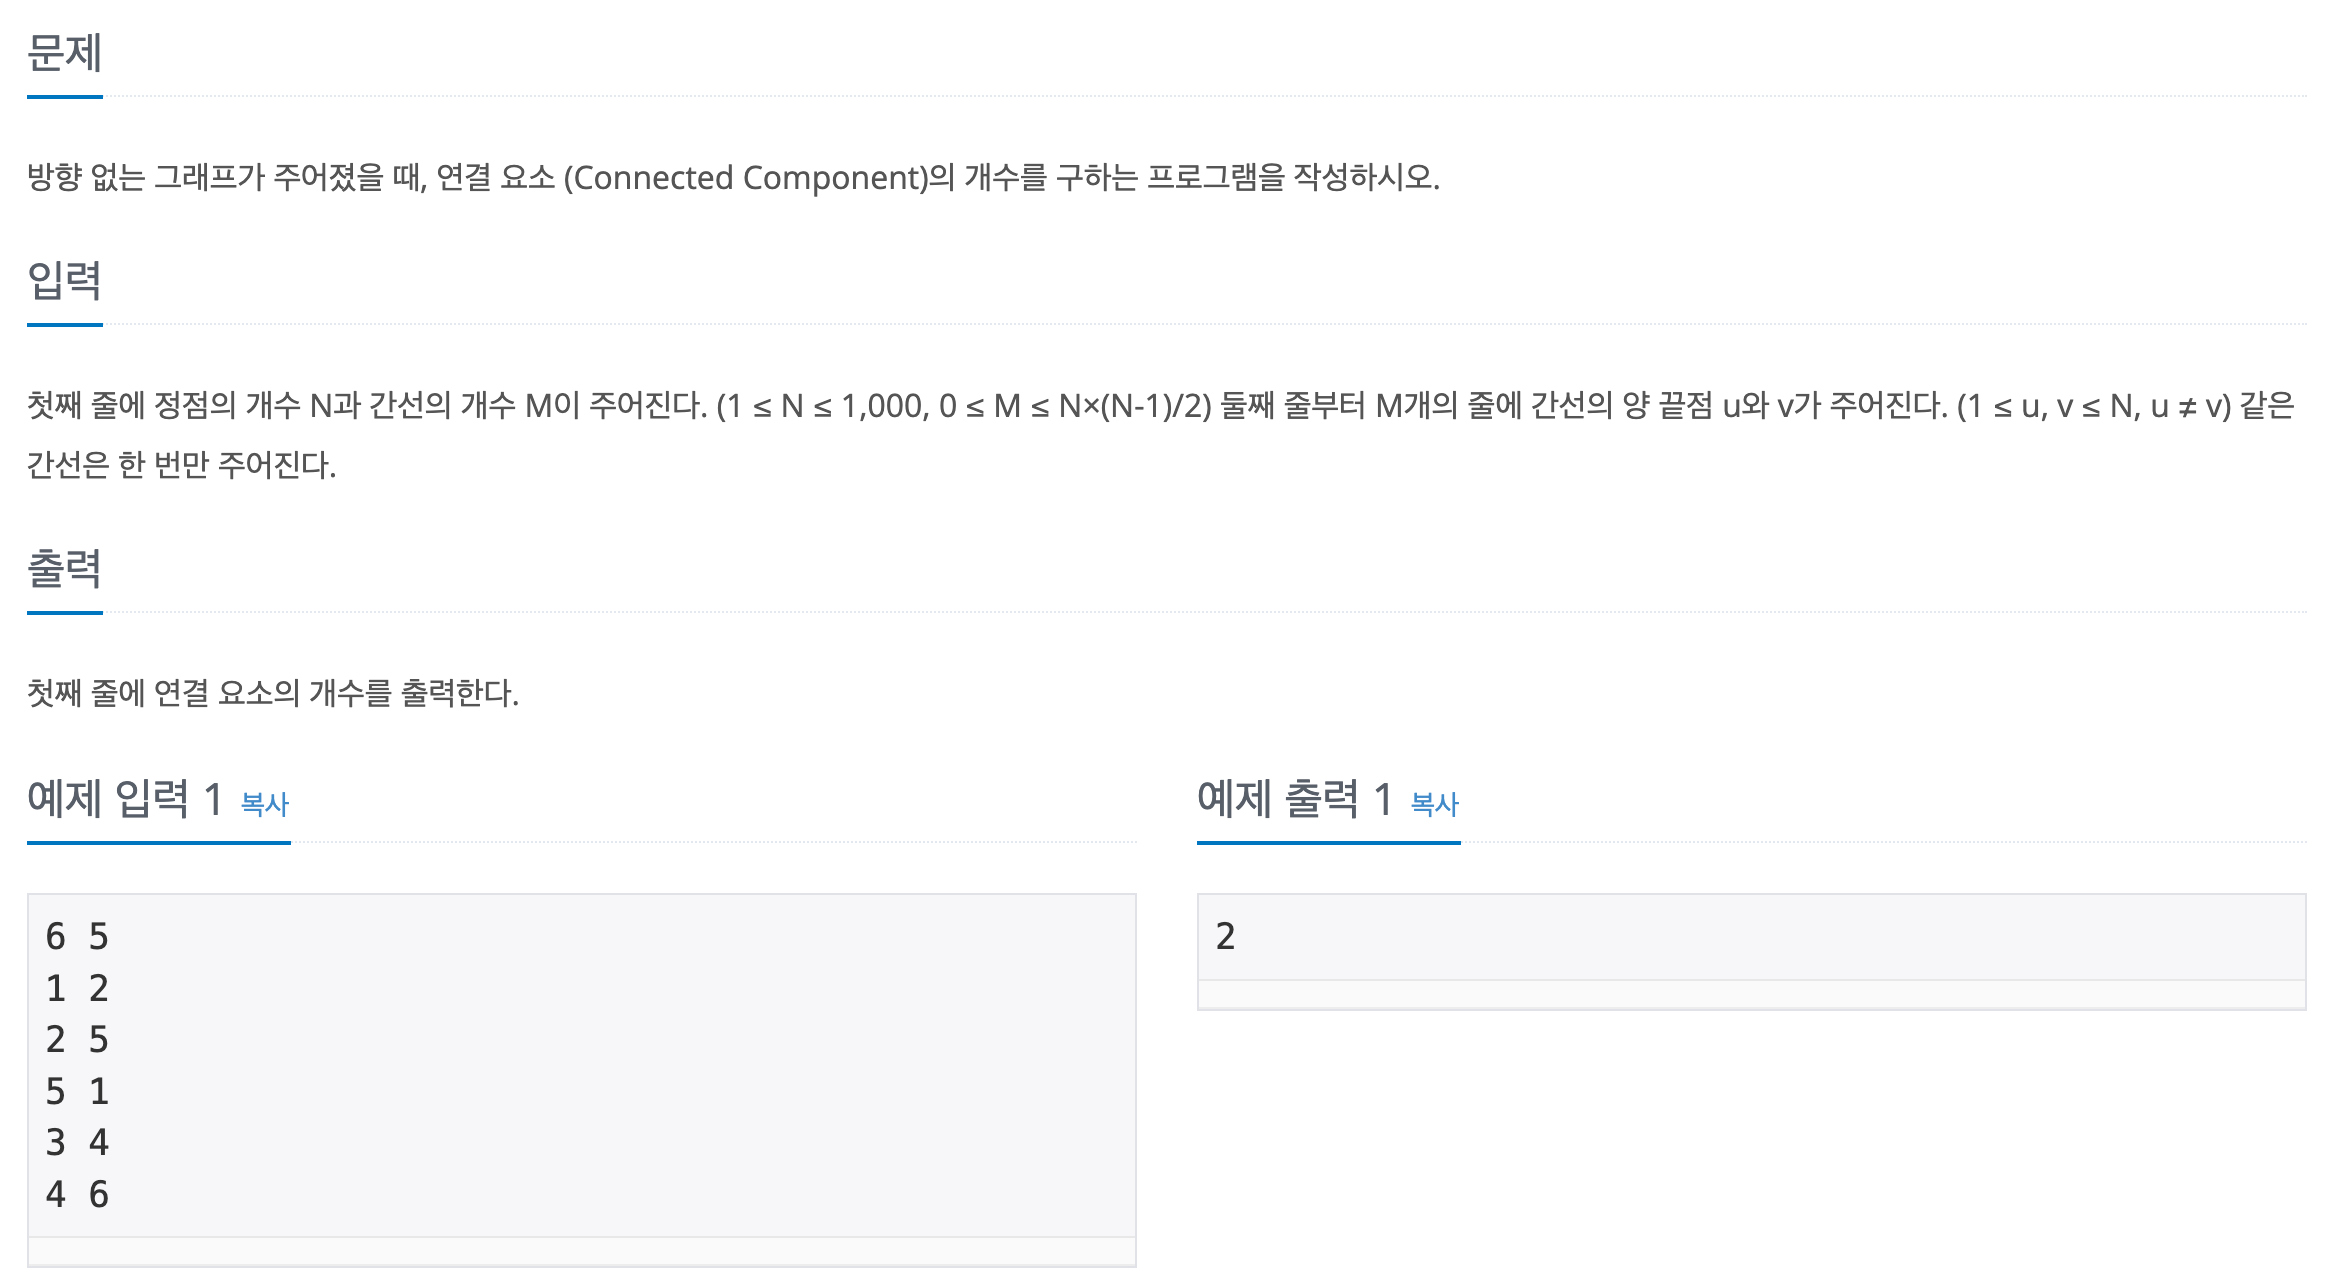

    상상코딩: 이중리스트에 각 노드 번호를 인덱스로 갖고, 연결된 노드의 리스트를 값으로 갖게한다.
    재귀를 통해 DFS를 돌고, visited를 갱신하며, DFS를 한번 돌때마다 연결요소 개수를 카운트한다.
    

### 복습 풀이
    문제: M개의 줄에 간선의 양 끝점 u와 v가 주어진다. (1 ≤ u, v ≤ N, u ≠ v)
    같은 간선은 한번만

In [190]:
from collections import deque, defaultdict
def bfs(s):
    q=deque([s])
    visited[s]=1
    while q:
        for n in g[q.popleft()]:
            if visited[n]==0:
                visited[n]=1
                q.append(n)
    return 1
N,M=map(int,input().split())
g=defaultdict(list)
for i in range(M):
    a,b=map(int,input().split())
    g[a]+=[b];g[b]+=[a]
visited=[0]*(N+1)
ce=0
for i in range(1,N+1):
    if visited[i]==0:
        ce+=bfs(i)
print(ce)

6 5
1 2
2 5
5 1
3 4
4 6
2


### 복습 풀이 연습

In [183]:
N,M=6,8

In [184]:
from collections import defaultdict
g=defaultdict(list)
for i in range(M):
    a,b=map(int,input().split())
    g[a]+=[b];g[b]+=[a]

1 2
2 5
5 1
3 4
4 6
5 4
2 4
2 3


In [185]:
g

defaultdict(list,
            {1: [2, 5],
             2: [1, 5, 4, 3],
             5: [2, 1, 4],
             3: [4, 2],
             4: [3, 6, 5, 2],
             6: [4]})

In [186]:
visited=[0]*(N+1)

In [187]:
from collections import deque

In [188]:
ce=0
for i in range(1,N+1):
    if visited[i]==0:
        ce+=bfs(i)
        print(ce,visited)

1 [0, 1, 1, 1, 1, 1, 1]


In [179]:
def bfs(s):
    q=deque([s])
    visited[s]=1
    while q:
        for n in g[q.popleft()]:
            if visited[n]==0:
                visited[n]=1
                q.append(n)
    return 1

### 이전 풀이 연습

In [37]:
N,M=map(int,input().split())
N,M

6 5


(6, 5)

In [42]:
g=[[] for _ in range(N+1)]

In [43]:
for i in range(M):
    a,b=map(int,input().split())
    g[a]+=[b];g[b]+=[a]

1 2
2 5
5 1
3 4
4 6


In [44]:
g

[[], [2, 5], [1, 5], [4], [3, 6], [2, 1], [4]]

In [45]:
v=[0]*(N+1)
v

[0, 0, 0, 0, 0, 0, 0]

In [46]:
def dfs(n):
    v[n]=1
    for i in g[n]:
        if v[i]==0:
            dfs(i)

In [47]:
c=0
for i in range(1,N+1):
    if v[i] == 0:
        dfs(i)
        c+=1

In [48]:
c

2

### 제출 풀이

In [ ]:
import sys
sys.setrecursionlimit(9**9)
i=sys.stdin.readline
N,M=map(int,i().split())
g=[[] for _ in range(N+1)]
for _ in range(M):
    a,b=map(int,i().split())
    g[a]+=[b];g[b]+=[a]
v=[0]*(N+1);c=0
def dfs(n):
    v[n]=1
    for i in g[n]:
        if v[i]==0:dfs(i)
for i in range(1,N+1):
    if v[i] == 0:
        dfs(i)
        c+=1
print(c)

## 1325 효율적인 해킹

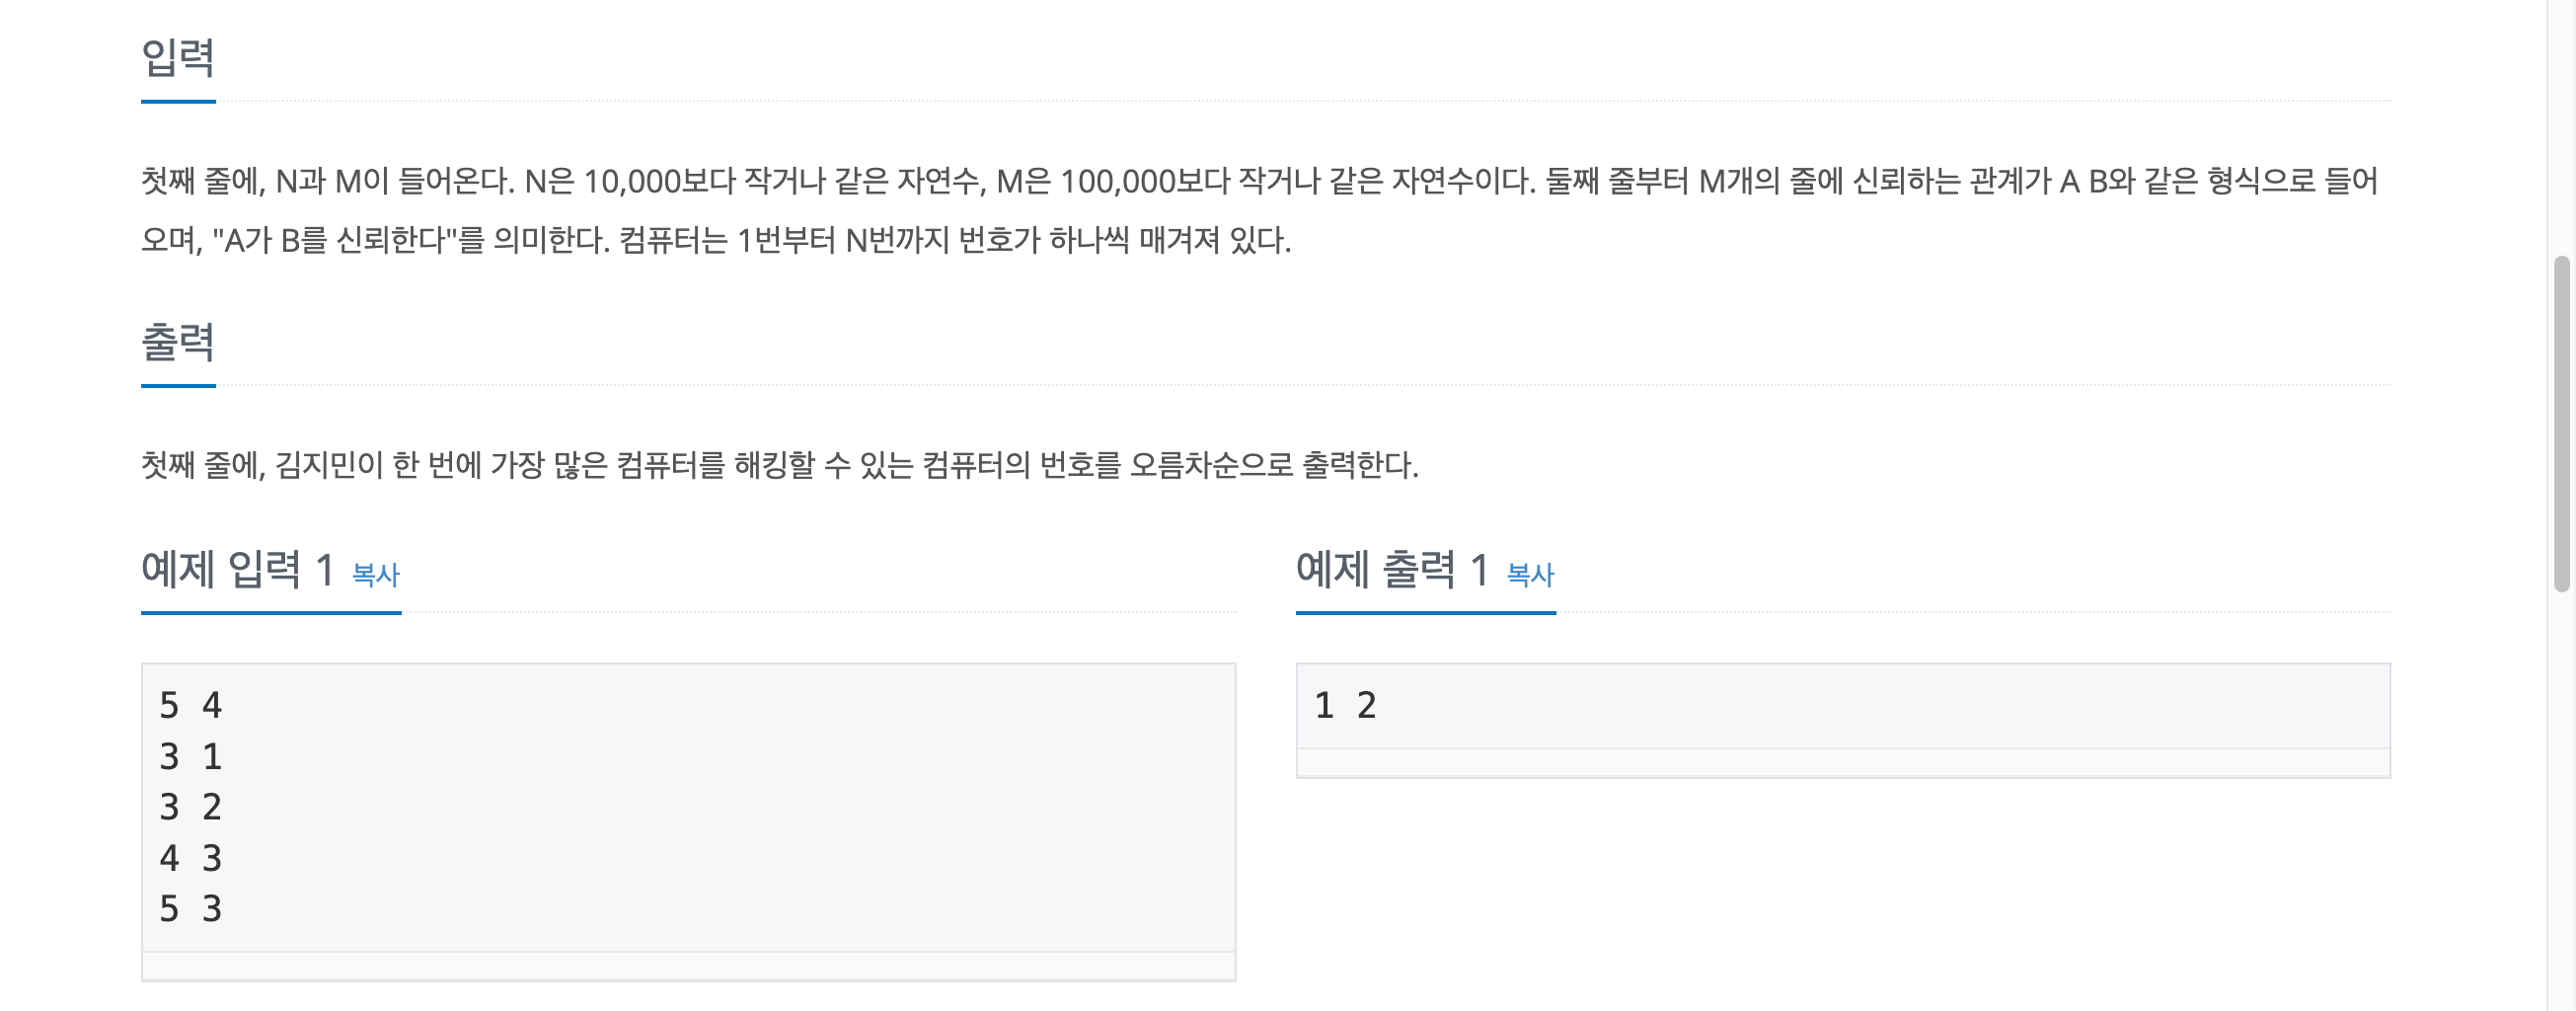

    입력
    첫째 줄에, N과 M이 들어온다. N은 10,000보다 작거나 같은 자연수, M은 100,000보다 작거나 같은 자연수이다. 둘째 줄부터 M개의 줄에 신뢰하는 관계가 A B와 같은 형식으로 들어오며, "A가 B를 신뢰한다"를 의미한다. 컴퓨터는 1번부터 N번까지 번호가 하나씩 매겨져 있다.

    출력
    첫째 줄에, 김지민이 한 번에 가장 많은 컴퓨터를 해킹할 수 있는 컴퓨터의 번호를 오름차순으로 출력한다.

상상코딩: 3 1의 경우 3이 1을 신뢰한다. 1을 해킹하면 3도 따라온다. 방향그래프에서 연결요소의 시작점을 찾는 문제이다.
    3번 인덱스에 3번 노드에서 갈수있는 노드들을 저장한다. 이미 방문하면 visited로 표시하고, 각 노드에서 DFS를 통해 result 리스트에 부모노드를 모두 저장
<br>    
풀이: A가 B를 신뢰할때, B를 해킹하면 A도 따라온다. 즉, B인덱스에 A노드를 추가하는 방향으로 이중리스트로 그래프를 표현하면, 한 컴퓨터를 해킹했을 때, 그래프를 타고타고가서 몇개가 해킹되는지를 알 수 있다.
이런 이중리스트를 만들고, BFS를 이용해 각 컴퓨터별로 최대 해킹되는 컴퓨터 개수를 구하고, 그 개수와 같은 컴퓨터 번호를 result에 저장한 뒤 출력.

### 복습 풀이
    N,M : 컴퓨터개수,(1~N, M개의 신뢰관계)
    M개의 줄에 걸쳐 A B (A가 B를 신뢰하는 관계가 주어진다.)
    B를 해킹하면 A도 따라온다.
    한 번에 가장 많은 컴퓨터를 해킹할 수 있는 컴퓨터의 번호를 오름차순으로 출력

    막힌 부분: 그래프 탐색을 어떤 방향으로 해야할지 모르겠다. 각 컴퓨터가 DFS/BFS를 할때 신뢰받는 컴퓨터가 신뢰하는 컴퓨터의 최대 길이를 visited 변수에 저장해야할거 같은데 어떻게 하는지 모르겠다. 1~5번까지 반복하면서 DFS의 최대길이를 저장하면 될까?
    M은 10만이다. 위처럼하면 O(M^2) 연산이 나온다. 어떻게할까
    
    해결 방법: 신뢰하는 컴퓨터의 최대 길이가 아니고, 신뢰하는 컴퓨터에 연결된 트리에 속하는 컴퓨터 전체가 해킹된다. 즉, 노드별로 연결된 컴퓨터들을 다 탐색해야 한다.
    핵심은 노드별로 BFS를 모두 돌며 카운트를 저장하는 것이다. O(M^2)연산이 맞는듯 싶다. DFS로 된 풀이는 메모리초과때문인지 없다. BFS로 안보고 풀어보자.

In [2]:
from collections import defaultdict, deque
def bfs(n):
    v=[0]*(N+1);cnt=0
    q=deque([n])
    v[n]=1
    while q:
        cur=q.popleft()
        for nx in g[cur]:
            if v[nx]==0:
                v[nx]=1;cnt+=1
                q.append(nx)
    return cnt
N,M=map(int,input().split())
g=defaultdict(list)
for _ in range(M):
    a,b=map(int,input().split())
    g[b]+=[a]
def main():
    result=0;rl=[] #result_list
    for i in range(1,N+1):
        cnt=bfs(i)
        if result<cnt:
            result=cnt
            rl.clear();rl=[i]
        elif result==cnt:
            rl+=[i]
    print(*rl)
if __name__=='__main__':
    main()

5 4
3 1
3 2
4 3
5 3
1 2


In [191]:
N,M=5,4

In [194]:
from collections import defaultdict

In [215]:
g=defaultdict(list)
for _ in range(M):
    a,b=map(int,input().split())
    g[b]+=[a]

3 1
3 2
4 3
5 3


In [220]:
g

defaultdict(list, {1: [3], 2: [3], 3: [4, 5], 4: [], 5: []})

In [221]:
result=0;rl=[] #result_list
for i in range(1,N+1):
    cnt=bfs(i)
    if result<cnt:
        result=cnt
        rl.clear();rl=[i]
    elif result==cnt:
        rl+=[i]
print(*rl)

1 3
2 3
3 2
4 0
5 0
1 2


In [219]:
def bfs(n):
    v=[0]*(N+1);cnt=0
    q=deque([n])
    v[n]=1
    while q:
        cur=q.popleft()
        for nx in g[cur]:
            if v[nx]==0:
                v[nx]=1;cnt+=1
                q.append(nx)
    return cnt

In [210]:
for i in range(1,N+1):
    if g[i]:
        if v[i]!=0:
            v[i]=dfs(i,0)
        print(i,v)
    else:
        v[i]=1

1 [0, 0, 0, 0, 1, 1]
2 [0, 0, 0, 0, 1, 1]
3 [0, 0, 0, 0, 1, 1]


In [209]:
# 방문 표시없이 그냥 가
def dfs(n,c):
    if v[n]!=0:
        return v[n]
    for k in g[n]:
        dfs(k,c+1)
    return c

In [49]:
N,M = map(int,input().split())
N,M

5 4


(5, 4)

In [68]:
g=[[] for _ in range(N+1)]
for _ in range(M):
    a,b=map(int,input().split())
    g[b]+=[a]

3 1
[[], [3], [], [], [], []]
3 2
[[], [3], [3], [], [], []]
4 3
[[], [3], [3], [4], [], []]
5 3
[[], [3], [3], [4, 5], [], []]


In [69]:
g

[[], [3], [3], [4, 5], [], []]

In [98]:
from collections import deque
def bfs(i):
    cnt=1
    v=[0]*(N+1)
    q=deque(g[i]);v[i]=1
    while q:
        n=q.popleft()
        if v[n]==0:
            v[n]=1;cnt+=1
            q.extend(g[n])
            print(f"{i}컴퓨터 해킹시: {n}컴퓨터도 해킹됨. 총 해킹 수:{cnt}, v:{v}")
    return cnt

In [99]:
result=0
l=[]
for i in range(1,N+1):
    cnt=bfs(i)
    if result<cnt:
        result=cnt
        l.clear();l+=[i]
        print(f"{result} 보다 {cnt}가 커서 갱신 : l={l}")
    elif result==cnt:
        l+=[i]

1컴퓨터 해킹시: 3컴퓨터도 해킹됨. 총 해킹 수:2, v:[0, 1, 0, 1, 0, 0]
1컴퓨터 해킹시: 4컴퓨터도 해킹됨. 총 해킹 수:3, v:[0, 1, 0, 1, 1, 0]
1컴퓨터 해킹시: 5컴퓨터도 해킹됨. 총 해킹 수:4, v:[0, 1, 0, 1, 1, 1]
4 보다 4가 커서 갱신 : l=[1]
2컴퓨터 해킹시: 3컴퓨터도 해킹됨. 총 해킹 수:2, v:[0, 0, 1, 1, 0, 0]
2컴퓨터 해킹시: 4컴퓨터도 해킹됨. 총 해킹 수:3, v:[0, 0, 1, 1, 1, 0]
2컴퓨터 해킹시: 5컴퓨터도 해킹됨. 총 해킹 수:4, v:[0, 0, 1, 1, 1, 1]
3컴퓨터 해킹시: 4컴퓨터도 해킹됨. 총 해킹 수:2, v:[0, 0, 0, 1, 1, 0]
3컴퓨터 해킹시: 5컴퓨터도 해킹됨. 총 해킹 수:3, v:[0, 0, 0, 1, 1, 1]


In [101]:
print(*l)

1 2


### 제출 풀이

In [103]:
from collections import deque
import sys
# input=sys.stdin.readline
N,M = map(int,input().split())
g=[[] for _ in range(N+1)]
for _ in range(M):
    a,b=map(int,input().split())
    g[b]+=[a]
def bfs(i):
    cnt=1;q=deque([i])
    v=[0]*(N+1);v[i]=1
    while q:
        cur=q.popleft()
        for n in g[cur]:
            if v[n]==0:
                v[n]=1;cnt+=1
                q.append(n)
    return cnt
def main():
    result=0;l=[]
    for i in range(1,N+1):
        cnt=bfs(i)
        if result<cnt:
            result=cnt
            l.clear();l+=[i]
        elif result==cnt:
            l+=[i]
    print(*l)
if __name__=='__main__':
    main()

5 4
3 1
3 2
4 3
5 3
1 2


## 2667 단지번호 붙이기

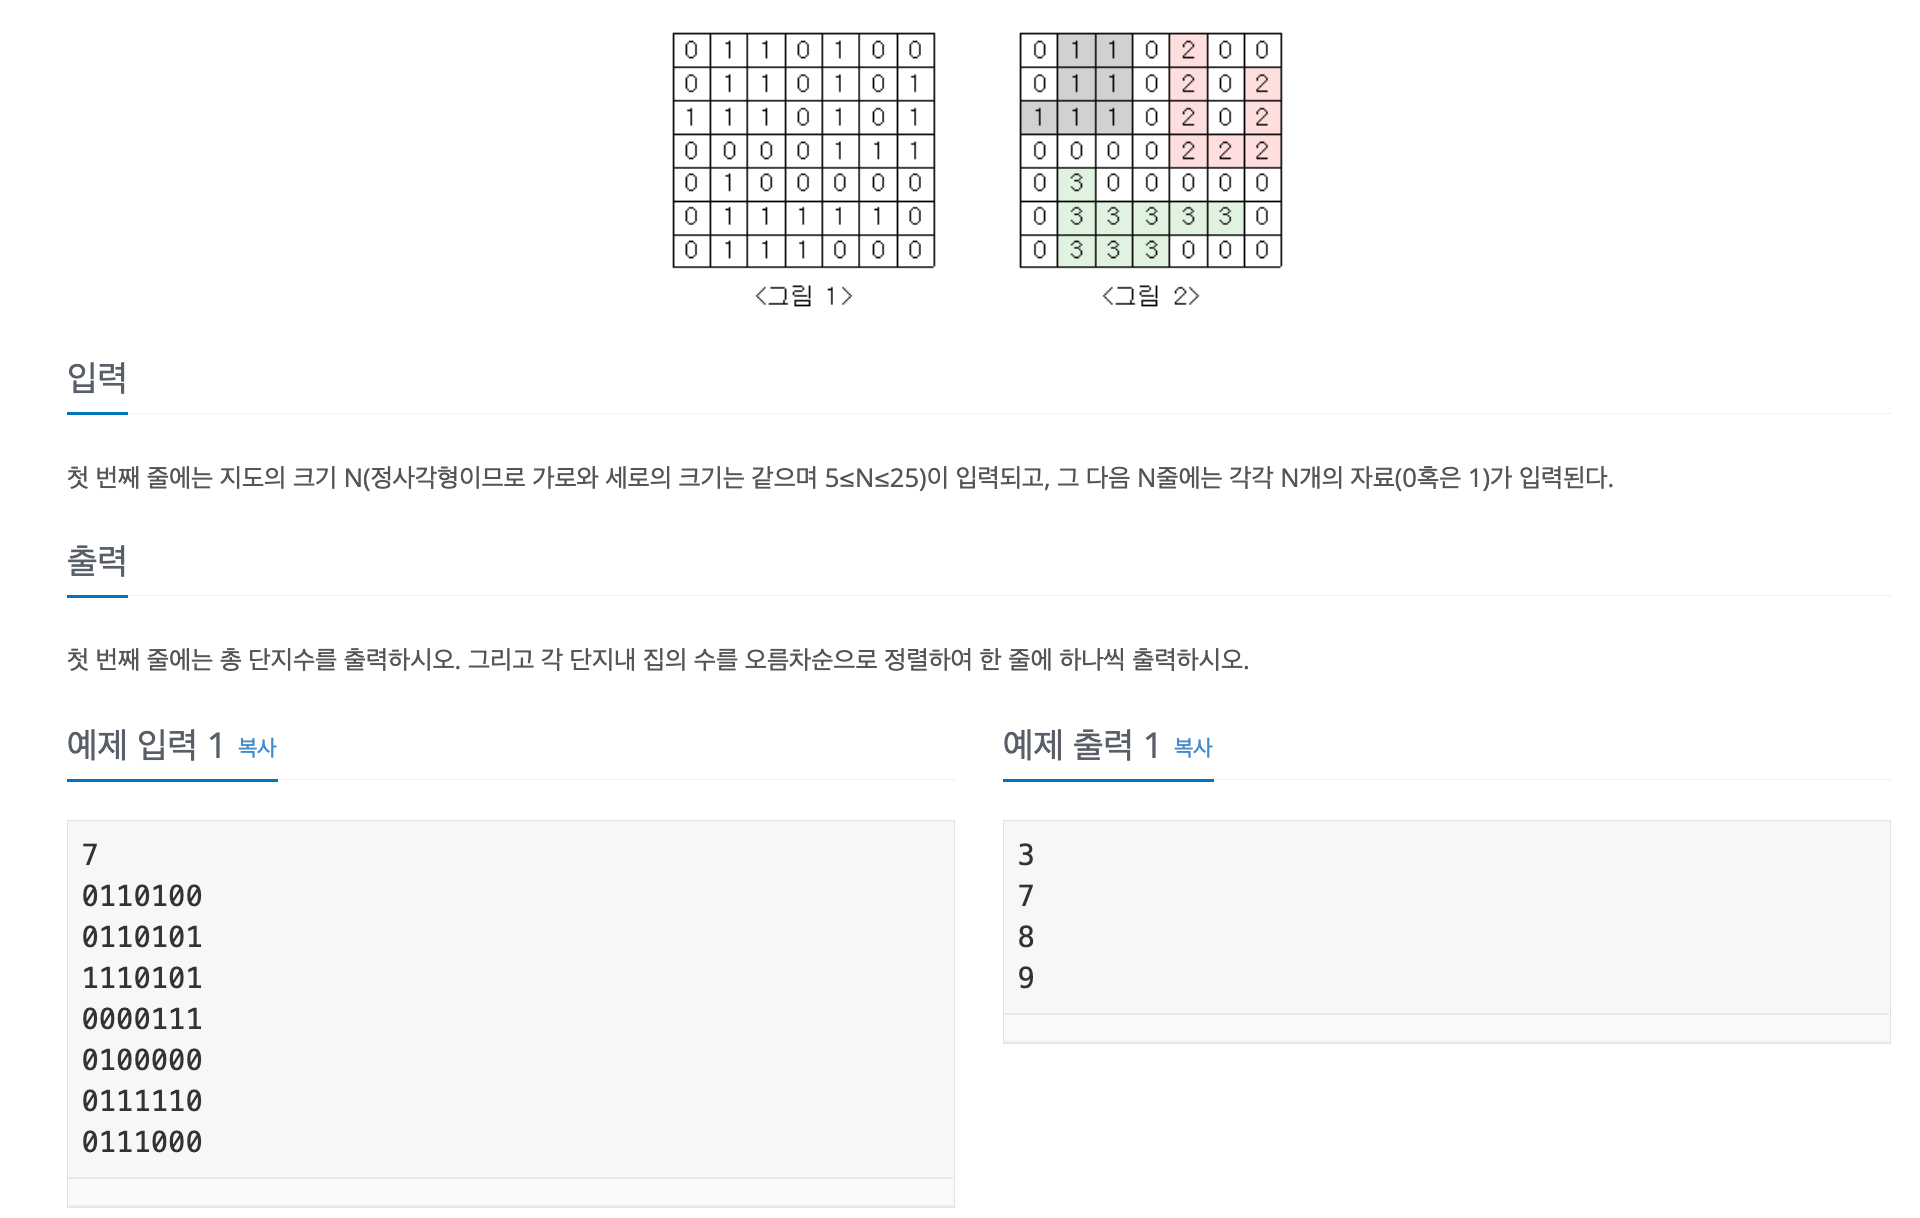

지도를 이중리스트에 저장하고, 이중 for문을 돌면서, 1을 만나면 지도 내에서, 상하좌우 4방향으로 1을 찾으며 찾을 때마다, 카운트를 한다. 이를 bfs함수로 구현하고, 카운트를 리턴<br>
카운트한 1은 모두 0으로 바꾼다. bfs의 리턴값은 결과 리스트에 저장 -> 오름차순 정렬해서 출력

In [124]:
from collections import deque

In [116]:
N=int(input())
m=[[*map(int,input())] for _ in range(N)]

1
1234


In [157]:

m="""0110100
0110101
1110101
0000111
0100000
0111110
0111000""".split()
m=[[*map(int,_)] for _ in m]

In [158]:
N,m

(7,
 [[0, 1, 1, 0, 1, 0, 0],
  [0, 1, 1, 0, 1, 0, 1],
  [1, 1, 1, 0, 1, 0, 1],
  [0, 0, 0, 0, 1, 1, 1],
  [0, 1, 0, 0, 0, 0, 0],
  [0, 1, 1, 1, 1, 1, 0],
  [0, 1, 1, 1, 0, 0, 0]])

In [159]:
dx = [0,0,1,-1]
dy = [1,-1,0,0]

In [160]:
def bfs(r,c):
    q=deque([(r,c)])
    cnt=1
    m[r][c]=0
    while q:
        r,c = q.popleft()
        for x,y in zip(dx,dy):
            nr=r+x
            nc=c+y
            if not((0<=nr<N) and (0<=nc<N)):
                continue
            if m[nr][nc]==1:
                cnt+=1
                m[nr][nc]=0
                q.append((nr,nc))
    return cnt

In [161]:
result=[]

In [162]:
for r in range(N):
    for c in range(N):
        if m[r][c]==1:
            print(r,c)
            result.append(bfs(r,c))

0 1
0 4
4 1


In [156]:
result

[7, 8, 9]

### 제출 풀이

In [163]:
from collections import deque
N=int(input())
m=[[*map(int,input())] for _ in range(N)]
dx = [0,0,1,-1]
dy = [1,-1,0,0]
def bfs(r,c):
    q=deque([(r,c)])
    cnt=1
    m[r][c]=0
    while q:
        r,c = q.popleft()
        for x,y in zip(dx,dy):
            nr=r+x
            nc=c+y
            if not((0<=nr<N) and (0<=nc<N)):
                continue
            if m[nr][nc]==1:
                cnt+=1
                m[nr][nc]=0
                q.append((nr,nc))
    return cnt
result=[]
for r in range(N):
    for c in range(N):
        if m[r][c]==1:
            result.append(bfs(r,c))
print(len(result))
print(*sorted(result),sep='\n')

3
7
8
9


## 14248 점프 점프

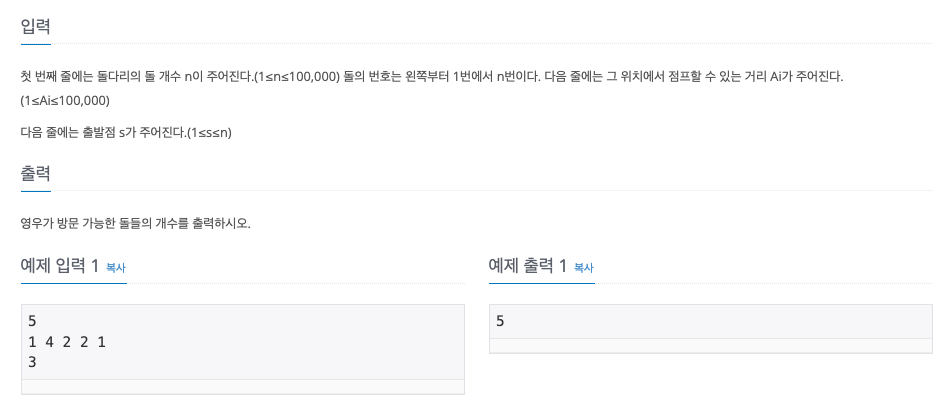

상상코딩: 

In [10]:
n = int(input())
v = [0]*n
bridge = list(map(int, input().split()))
s = int(input())
cnt=1

5
1 4 2 2 1
3


In [18]:
n,v,bridge,s,cnt = (5, [0, 0, 0, 0, 0], [1, 4, 2, 2, 1], 3,1)

In [19]:
def dfs(x):
    global cnt
    for i in range(2):
        if i==0:
            nx= x+bridge[x]
        else:
            nx= x-bridge[x]
        print(f"{nx=}")
        if 0<=nx<n and not v[nx]:
            print(f"{cnt=}번째, {nx=} 방문")
            v[nx]=1
            cnt+=1
            dfs(nx)

In [20]:
dfs(s-1)

nx=4
cnt=1번째, nx=4 방문
nx=5
nx=3
cnt=2번째, nx=3 방문
nx=5
nx=1
cnt=3번째, nx=1 방문
nx=5
nx=-3
nx=0
cnt=4번째, nx=0 방문
nx=1
nx=-1


In [7]:
cnt

5

In [8]:
v

[1, 1, 0, 1, 1, 0]

### 제출 풀이

In [ ]:
import sys
input = sys.stdin.readline
sys.setrecursionlimit(10**6)
n=int(input())
b=list(map(int, input().split()))
s=int(input())
cnt=1;v=[0]*n
def dfs(x):
    global cnt
    for nx in (x+b[x], x-b[x]):
        if 0<=nx<n and v[nx]==0:
            cnt+=1;v[nx]=1
            dfs(nx)
dfs(s-1)
print(cnt)

## 2606 바이러스
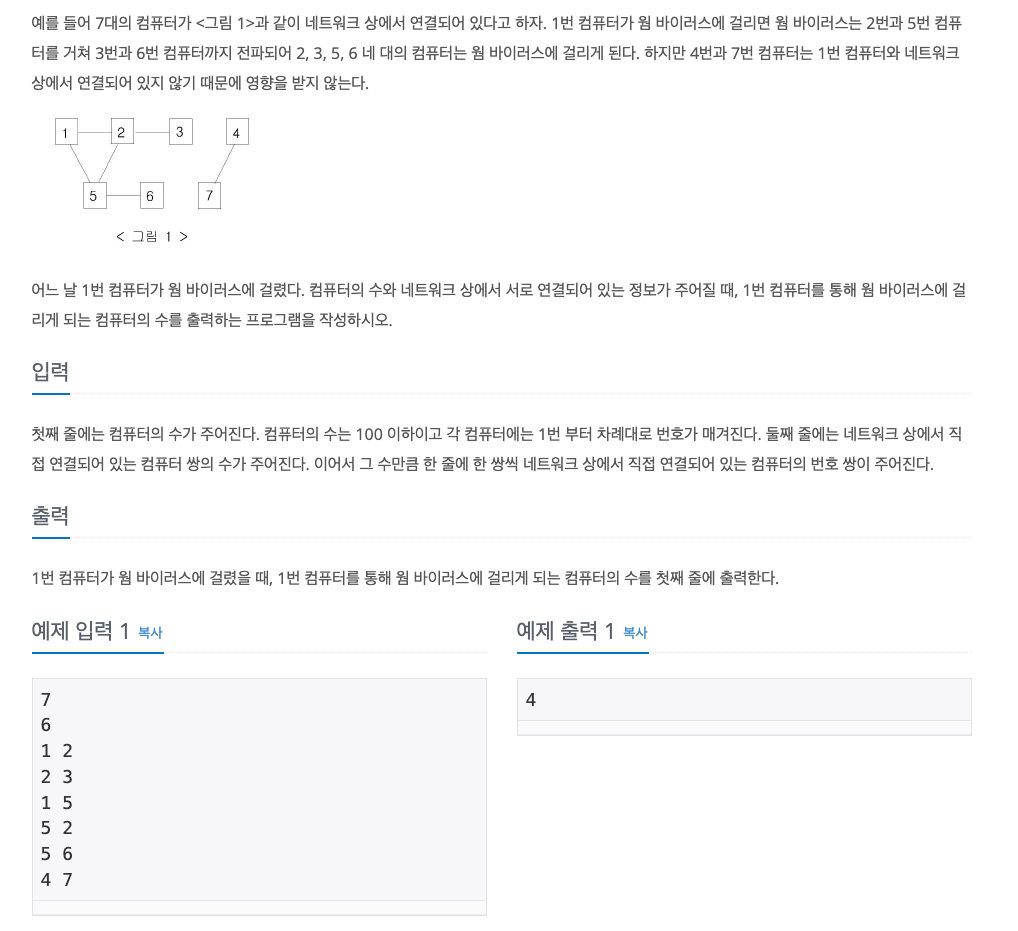

<br>
상상코딩: 1번 컴퓨터가 웜 바이러스에 걸렸을 때, 1번과 연결된 컴퓨터들의 개수를 찾으면된다.
입력으로 주어진것으로 2차원 배열로 그래프를 구현하고, 1번에서 bfs를 돌며 연결된 컴퓨터를 찾는 코드를 짜면 된다.

### 제출풀이 - BFS

In [64]:
from collections import deque
n=int(input())
v=int(input())
graph = [[] for i in range(n+1)]
visited=[0]*(n+1)
for i in range(v):
    a,b=map(int,input().split())
    graph[a]+=[b]
    graph[b]+=[a]
visited[1]=1
Q=deque([1])
while Q:
    c=Q.popleft()
    for nx in g[c]:
        if visited[nx]==0:
            Q.append(nx)
            visited[nx]=1
print(sum(visited)-1)

7
6
1 2
2 3
1 5
5 2
5 6
4 7
4


### 제출풀이 - DFS

In [ ]:
n=int(input())
v=int(input())
graph = [[] for i in range(n+1)]
visited=[0]*(n+1)
for i in range(v):
    a,b=map(int,input().split())
    graph[a]+=[b]
    graph[b]+=[a]
def dfs(v):
    visited[v]=1
    for nx in graph[v]:
        if visited[nx]==0:
            dfs(nx)
dfs(1)
print(sum(visited)-1)

In [35]:
n=7
v=6

In [42]:
g = [[] for i in range(n+1)]

In [43]:
g

[[], [], [], [], [], [], [], []]

In [49]:
visited=[0]*(n+1)

In [44]:
for i in range(v):
    a,b=map(int,input().split())
    g[a]+=[b]
    g[b]+=[a]

1 2
2 3
1 5
5 2
5 6
4 7


In [45]:
g

[[], [2, 5], [1, 3, 5], [2], [7], [1, 2, 6], [5], [4]]

In [46]:
from collections import deque

In [47]:
Q=deque([1])

In [48]:
Q.popleft()

1

In [58]:
def bfs(g):
    cnt=0
    visited[1]=1
    Q=deque([1])
    while Q:
        c=Q.popleft()
        for nx in g[c]:
            if visited[nx]==0:
                Q.append(nx)
                cnt+=1
                visited[nx]=1
    return cnt

In [59]:
g

[[], [2, 5], [1, 3, 5], [2], [7], [1, 2, 6], [5], [4]]

In [57]:
bfs(g)

5

#### 다른사람 숏코딩

In [ ]:
n=int(input())
v=int(input())
graph = [[] for i in range(n+1)]
visited=[0]*(n+1)
for i in range(v):
    a,b=map(int,input().split())
    graph[a]+=[b]
    graph[b]+=[a]
def dfs(v):
    visited[v]=1
    for nx in graph[v]:
        if visited[nx]==0:
            dfs(nx)
dfs(1)
print(sum(visited)-1)